In [58]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point
from geopandas import GeoDataFrame

In [6]:
data=pd.read_csv('race.csv')

In [28]:
data

,Unnamed: 0,season,round,circuit_id,lat,long,country,date,url
0,0,1990,1,phoenix,33.4479,-112.07500,USA,1990-03-11,http://en.wikipedia.org/wiki/1990_United_State...
1,1,1990,2,interlagos,-23.7036,-46.69970,Brazil,1990-03-25,http://en.wikipedia.org/wiki/1990_Brazilian_Gr...
2,2,1990,3,imola,44.3439,11.71670,Italy,1990-05-13,http://en.wikipedia.org/wiki/1990_San_Marino_G...
3,3,1990,4,monaco,43.7347,7.42056,Monaco,1990-05-27,http://en.wikipedia.org/wiki/1990_Monaco_Grand...
4,4,1990,5,villeneuve,45.5000,-73.52280,Canada,1990-06-10,http://en.wikipedia.org/wiki/1990_Canadian_Gra...
...,...,...,...,...,...,...,...,...,...
546,546,2020,13,imola,44.3439,11.71670,Italy,2020-11-01,https://en.wikipedia.org/wiki/2020_Emilia_Roma...
547,547,2020,14,istanbul,40.9517,29.40500,Turkey,2020-11-15,https://en.wikipedia.org/wiki/2020_Turkish_Gra...
548,548,2020,15,bahrain,26.0325,50.51060,Bahrain,2020-11-29,https://en.wikipedia.org/wiki/2020_Bahrain_Gra...
549,549,2020,16,bahrain,26.0325,50.51060,Bahrain,2020-12-06,https://en.wikipedia.org/wiki/2020_Sakhir_Gran...


In [53]:
cities=pd.DataFrame({'circuit_id':data['circuit_id'],
                    'lat':data['lat'],
                    'long':data['long']})

In [54]:
cities

,circuit_id,lat,long
0,phoenix,33.4479,-112.07500
1,interlagos,-23.7036,-46.69970
2,imola,44.3439,11.71670
3,monaco,43.7347,7.42056
4,villeneuve,45.5000,-73.52280
...,...,...,...
546,imola,44.3439,11.71670
547,istanbul,40.9517,29.40500
548,bahrain,26.0325,50.51060
549,bahrain,26.0325,50.51060


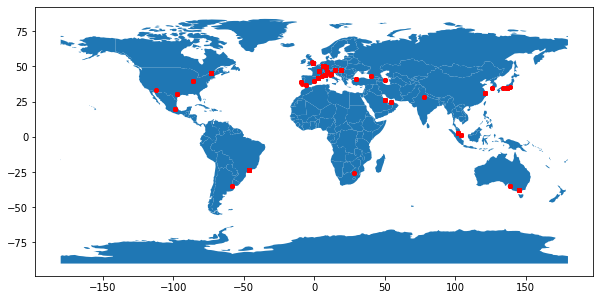

In [60]:
geometry = [Point(xy) for xy in zip(data['long'], data['lat'])]
gdf = GeoDataFrame(data, geometry=geometry)   

#this is a simple map that goes with geopandas
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
gdf.plot(ax=world.plot(figsize=(10, 6)), marker='o', color='red', markersize=15);